In [313]:
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.regression import linear_model
from sklearn import linear_model as sk_linear
import statsmodels.api as sm
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [314]:
yearly_country_df = pd.read_csv("Resources/yearly_country_data.csv")
yearly_averages_df = pd.read_csv("Resources/all_variables_avg.csv")
yearly_averages_df.head()

,Unnamed: 0,Country,Gini Index Five Year Average,Workforce Ratio Five Year Average,Happy,Economy,Family,Health,Freedom,Trust,Generous
0,0,Albania,33.266667,72.239452,4.8827,9.417931,0.671070,68.708138,0.781994,0.896304,-0.042309
1,1,Argentina,41.533333,67.997396,5.9747,9.810955,0.900568,68.803802,0.831132,0.842010,-0.194914
2,2,Armenia,33.225000,71.844352,4.6768,9.100476,0.757479,66.750656,0.712018,0.773545,-0.138780
3,3,Austria,30.333333,82.749968,7.2942,10.742824,0.928046,73.002502,0.899989,0.499955,0.085429
4,4,Bangladesh,32.400000,42.876669,4.8328,8.287064,0.687293,64.503067,0.900625,0.661844,-0.033665


In [315]:
Y = yearly_averages_df['Happy']
X = yearly_averages_df[['Gini Index Five Year Average',
                        'Workforce Ratio Five Year Average',
                        'Economy',
                        'Family',
                        'Health',
                       'Trust',
                       'Generous']]
happy_model = linear_model.OLS(Y, X).fit()


In [316]:
happy_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Happy   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              1296.
Date:                Sat, 17 Oct 2020   Prob (F-statistic):                    1.20e-86
Time:                        13:01:05   Log-Likelihood:                         -82.014
No. Observations:                  96   AIC:                                      178.0
Df Residuals:                      89   BIC:                                      196.0
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Gini Index Five Year Average         -0.0097      0.008     -1.241      0.218      -0.025       0.006
Workforce Ratio Five Year Average    -0.0019      0.004     -0.494      0.623      -0.009       0.006
Economy                               0.1224      0.126      0.974      0.333      -0.127       0.372
Family                                3.7805      0.975      3.879      0.000       1.844       5.717
Health                                0.0460      0.016      2.920      0.004       0.015       0.077
Trust                                -1.5928      0.348     -4.574      0.000      -2.285      -0.901
Generous                              0.2833      0.393      0.722      0.472      -0.497       1.063
==============================================================================
Omnibus:                        3.824   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.148   Jarque-Bera (JB):                3.725
Skew:                          -0.220   Prob(JB):                        0.155
Kurtosis:                       3.859   Cond. No.                     1.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [317]:
x_interaction = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(X)
interaction_df = pd.DataFrame(x_interaction, columns = ['Gini Index Five Year Average',
                        'Workforce Ratio Five Year Average',
                        'Economy',
                        'Family',
                        'Health',
                        'Trust',
                        'Generous',
                                                        
                        'Gini Index Five Year Average:Workforce Ratio Five Year Average',
                        'Gini Index Five Year Average:Economy',
                        'Gini Index Five Year Average:Family',
                        'Gini Index Five Year Average:Health',
                        'Gini Index Five Year Average:Trust',
                        'Gini Index Five Year Average:Generous',
                                                        
                        'Workforce Ratio Five Year Average:Economy',
                        'Workforce Ratio Five Year Average:Family',
                        'Workforce Ratio Five Year Average:Health',
                        'Workforce Ratio Five Year Average:Trust',
                        'Workforce Ratio Five Year Average:Generous',
                                                        
                        'Economy:Family',
                        'Economy:Health',
                        'Economy:Trust',
                        'Economy:Generous',
                                                        
                        'Family:Health',
                        'Family:Trust',
                        'Family:Generous',
                                                        
                        'Health:Trust',
                        'Health:Generous',
                                                        
                        'Trust:Generous'])                                

In [318]:
interaction_model = linear_model.OLS(Y, interaction_df).fit()
interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Happy   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              523.4
Date:                Sat, 17 Oct 2020   Prob (F-statistic):                    5.19e-69
Time:                        13:01:05   Log-Likelihood:                         -46.301
No. Observations:                  96   AIC:                                      148.6
Df Residuals:                      68   BIC:                                      220.4
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Gini Index Five Year Average                                       0.3701      0.142      2.614      0.011       0.088       0.653
Workforce Ratio Five Year Average                                 -0.1041      0.060     -1.721      0.090      -0.225       0.017
Economy                                                            0.6644      2.098      0.317      0.752      -3.522       4.851
Family                                                           -31.4649     20.008     -1.573      0.120     -71.391       8.461
Health                                                             0.0989      0.220      0.450      0.654      -0.339       0.537
Trust                                                             13.7745      8.065      1.708      0.092      -2.319      29.868
Generous                                                           2.1738      5.814      0.374      0.710      -9.428      13.775
Gini Index Five Year Average:Workforce Ratio Five Year Average    -0.0024      0.001     -2.758      0.007      -0.004      -0.001
Gini Index Five Year Average:Economy                              -0.0249      0.020     -1.273      0.207      -0.064       0.014
Gini Index Five Year Average:Family                                0.1722      0.184      0.937      0.352      -0.194       0.539
Gini Index Five Year Average:Health                               -0.0002      0.003     -0.072      0.943      -0.006       0.005
Gini Index Five Year Average:Trust                                -0.1038      0.084     -1.238      0.220      -0.271       0.064
Gini Index Five Year Average:Generous                             -0.0558      0.080     -0.696      0.489      -0.216       0.104
Workforce Ratio Five Year Average:Economy                          0.0165      0.008      2.171      0.033       0.001       0.032
Workforce Ratio Five Year Average:Family                          -0.0727      0.057     -1.271      0.208      -0.187       0.041
Workforce Ratio Five Year Average:Health                           0.0008      0.001      0.626      0.533      -0.002       0.003
Workforce Ratio Five Year Average:Trust                            0.0582      0.038      1.548      0.126      -0.017       0.133
Workforce Ratio Five Year Average:Generous                         0.0600      0.029      2.034      0.046       0.001       0.119
Economy:Family                                                     0.8765      1.170      0.749      0.456      -1.458       3.211
Economy:Health                                                    -0.0298      0.017     -1.720      0

In [319]:
interaction_model.pvalues[interaction_model.pvalues < 0.05]

Gini Index Five Year Average                                      0.010996
Gini Index Five Year Average:Workforce Ratio Five Year Average    0.007468
Workforce Ratio Five Year Average:Economy                         0.033392
Workforce Ratio Five Year Average:Generous                        0.045850
dtype: float64

In [320]:
custom_interaction_df = X
custom_interaction_df['Gini Index Five Year Average * Workforce Ratio Five Year Average'] = interaction_df['Gini Index Five Year Average:Workforce Ratio Five Year Average']
custom_interaction_df['Workforce Ratio Five Year Average*Economy'] = interaction_df['Workforce Ratio Five Year Average:Economy']
custom_interaction_df['Workforce Ratio Five Year Average*Generous'] = interaction_df['Workforce Ratio Five Year Average:Generous']


<ipython-input-320-0caa2f562ed4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custom_interaction_df['Gini Index Five Year Average * Workforce Ratio Five Year Average'] = interaction_df['Gini Index Five Year Average:Workforce Ratio Five Year Average']
<ipython-input-320-0caa2f562ed4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custom_interaction_df['Workforce Ratio Five Year Average*Economy'] = interaction_df['Workforce Ratio Five Year Average:Economy']
<ipython-input-320-0caa2f562ed4>:4: SettingWit

In [321]:

custom_interaction_model = linear_model.OLS(Y, custom_interaction_df).fit()
custom_interaction_model.summary()
                                                         
                                                         

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Happy   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              1166.
Date:                Sat, 17 Oct 2020   Prob (F-statistic):                    2.56e-87
Time:                        13:01:06   Log-Likelihood:                         -68.399
No. Observations:                  96   AIC:                                      156.8
Df Residuals:                      86   BIC:                                      182.4
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Gini Index Five Year Average                                         0.1959      0.054      3.624      0.000       0.088       0.303
Workforce Ratio Five Year Average                                   -0.0211      0.013     -1.649      0.103      -0.046       0.004
Economy                                                             -0.7398      0.208     -3.553      0.001      -1.154      -0.326
Family                                                               1.8183      0.972      1.871      0.065      -0.114       3.750
Health                                                               0.0539      0.017      3.242      0.002       0.021       0.087
Trust                                                               -0.6221      0.373     -1.667      0.099      -1.364       0.120
Generous                                                            -3.4103      1.901     -1.794      0.076      -7.189       0.368
Gini Index Five Year Average * Workforce Ratio Five Year Average    -0.0025      0.001     -3.519      0.001      -0.004      -0.001
Workforce Ratio Five Year Average*Economy                            0.0130      0.003      4.992      0.000       0.008       0.018
Workforce Ratio Five Year Average*Generous                           0.0547      0.026      2.105      0.038       0.003       0.106
==============================================================================
Omnibus:                       11.859   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               21.661
Skew:                           0.445   Prob(JB):                     1.98e-05
Kurtosis:                       5.150   Cond. No.                     1.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [322]:

yearly_averages_df.columns
yearly_averages_df.pop('Unnamed: 0')


0      0
1      1
2      2
3      3
4      4
      ..
91    91
92    92
93    93
94    94
95    95
Name: Unnamed: 0, Length: 96, dtype: int64

In [323]:
custom_predictions = custom_interaction_model.predict(custom_interaction_df)
custom_model_df = yearly_averages_df
custom_model_df['Predicted Happy'] = custom_predictions
custom_model_df['Residuals'] = custom_model_df['Happy']-custom_model_df['Predicted Happy']
print(custom_model_df['Residuals'].mean())

0.0004378594419796646


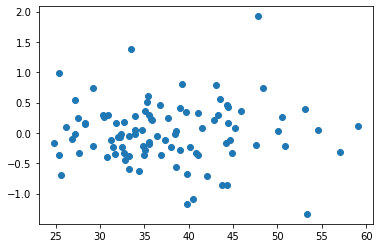

In [324]:
#Residuals plot for Gini Coef
plt.scatter(custom_model_df['Gini Index Five Year Average'],custom_model_df['Residuals'])
plt.show()


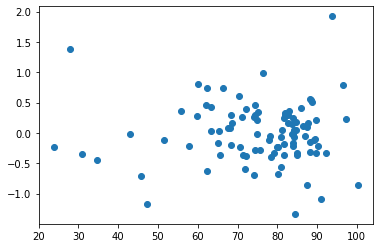

In [325]:
#Residuals plot for Gender ratio
plt.scatter(custom_model_df['Workforce Ratio Five Year Average'],custom_model_df['Residuals'])
plt.show()

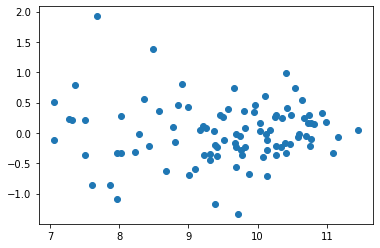

In [326]:
#Residuals plot for Economy(log GDP per capita)
plt.scatter(custom_model_df['Economy'],custom_model_df['Residuals'])
plt.show()

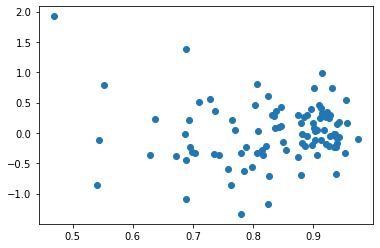

In [327]:
#Residuals plot for Family)
plt.scatter(custom_model_df['Family'],custom_model_df['Residuals'])
plt.show()

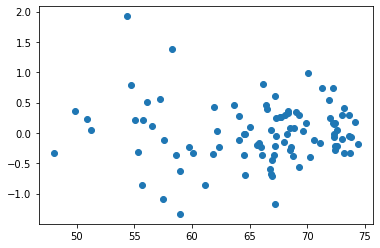

In [328]:
#Residuals plot for Health)
plt.scatter(custom_model_df['Health'],custom_model_df['Residuals'])
plt.show()

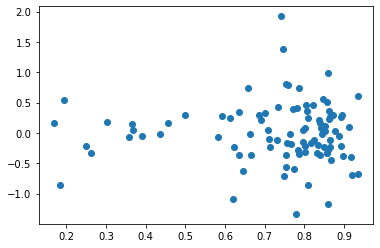

In [329]:
#Residuals plot for Trust)
plt.scatter(custom_model_df['Trust'],custom_model_df['Residuals'])
plt.show()

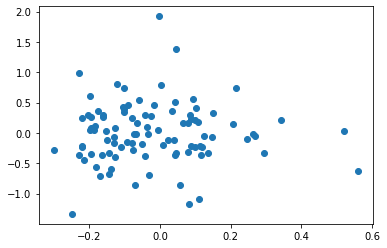

In [330]:
#Residuals plot for Generous)
plt.scatter(custom_model_df['Generous'],custom_model_df['Residuals'])
plt.show()

In [336]:
corr = yearly_averages_df.corr(method='spearman')
yearly_averages_df.head()

,Country,Gini Index Five Year Average,Workforce Ratio Five Year Average,Happy,Economy,Family,Health,Freedom,Trust,Generous,Predicted Happy,Residuals
0,Albania,33.266667,72.239452,4.8827,9.417931,0.671070,68.708138,0.781994,0.896304,-0.042309,5.265992,-0.383292
1,Argentina,41.533333,67.997396,5.9747,9.810955,0.900568,68.803802,0.831132,0.842010,-0.194914,5.891830,0.082870
2,Armenia,33.225000,71.844352,4.6768,9.100476,0.757479,66.750656,0.712018,0.773545,-0.138780,5.275504,-0.598704
3,Austria,30.333333,82.749968,7.2942,10.742824,0.928046,73.002502,0.899989,0.499955,0.085429,6.996394,0.297806
4,Bangladesh,32.400000,42.876669,4.8328,8.287064,0.687293,64.503067,0.900625,0.661844,-0.033665,4.845352,-0.012552


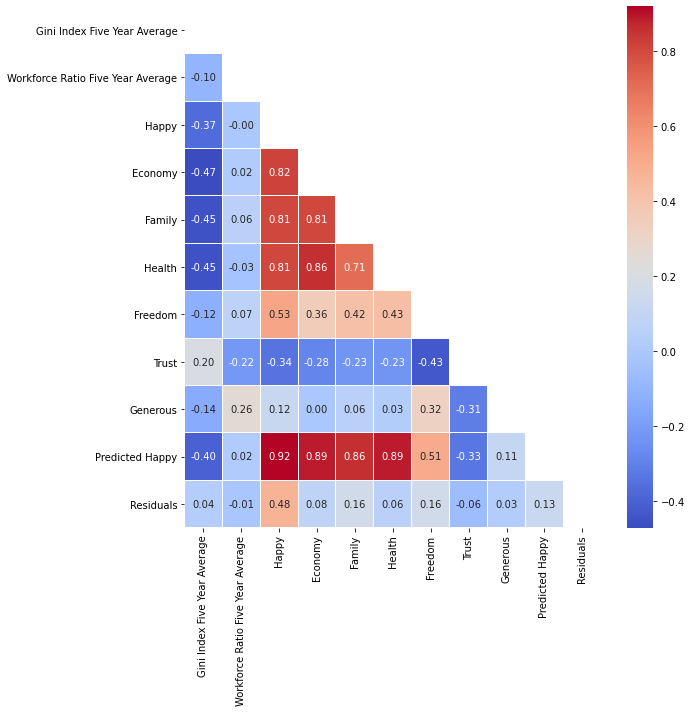

In [337]:
#Correlation Coefficient Heatmap for initial 

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
hm = sns.heatmap(round(corr,2), mask=mask, annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)

#fig.suptitle('Correlation matrix of features', fontsize=15)


fig.tight_layout()

<ipython-input-333-3413d1e88ccc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_new_custom_df['Happy'] = yearly_averages_df['Happy']


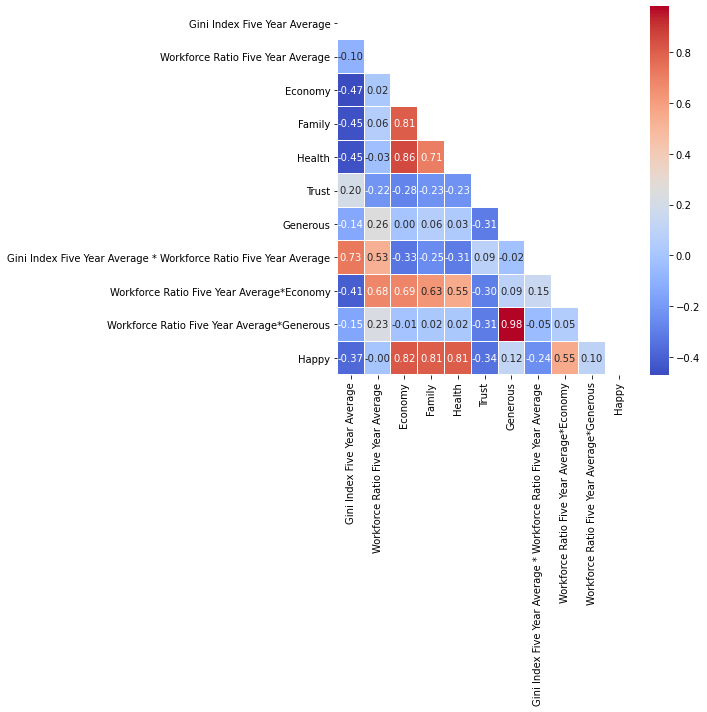

In [333]:
#Correlation Coefficient Heatmap for regression model using most significant interaction effects
my_new_custom_df = custom_interaction_df
my_new_custom_df['Happy'] = yearly_averages_df['Happy']
corr = my_new_custom_df.corr(method='spearman')

# Generate a mask for the upper triangle
mask1 = np.zeros_like(corr, dtype=np.bool)
mask1[np.triu_indices_from(mask1)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
hm = sns.heatmap(round(corr,2), mask=mask1, annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)




fig.tight_layout()